# 线性神经网络

# 1. 线性回归

何谓回归？



## 1.1 线性回归的基本元素

线性回归（linear regression）可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量
和因变量$\mathbb{x}$和$y$之间的关系是线性的， 即$y$可以表示为$\mathbb{x}$中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

机器学习术语：
训练（数据）集，测试集，样本，标签label 或 目标 target，特征feature或协变量covariate

### 1.1.1 线性模型

在开始寻找最好的模型参数（model parameters）和之前， 我们还需要两个东西： （1）一种模型质量的度量方式，即模型拟合得有多好的定量评估； （2）一种能够更新模型以提高模型预测质量的方法。

### 1.1.2 损失函数


### 1.1.3 解析解(analytic solution, 闭式解, closed-form solution)

least square solution to the problem of fitting X using the model $y = X w + b $: $$w^* = (X^T X)^{-1}X^T y$$

注1：机器学习领域通常将w和b分开来写，但是闭式解中的$w^*$和$X$应该理解为扩展版本，把b吸收进去了

注2：机器学习领域中用$X$表示数据集时，通常是一行表示一个数据样本向量

### 1.1.4 随机梯度下降(SGD: stochastic gradient descent)

### 1.1.5 用模型进行预测

## 1.2 向量化加速

In [10]:
%matplotlib inline
import math
import time
import numpy as np
import torch
print(torch.__version__)
print(torch.cuda.is_available())

ModuleNotFoundError: No module named 'torch'

In [8]:
#from d2l import torch as d2l
import d2l

In [4]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [5]:
# 定义一个计时器类，用于进行运行时间的基准测试
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10304 sec'

In [7]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

## 1.3 正态分布与平方损失


In [12]:
from d2l import torch as d2l
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

ModuleNotFoundError: No module named 'torch'

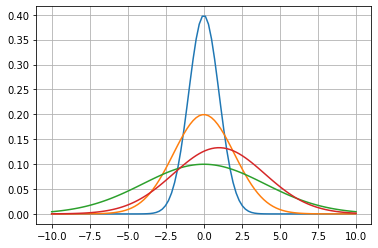

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# print(norm.ppf(0.01), norm.ppf(0.99))
x = np.linspace(-10, 10,100)

fig,ax = plt.subplots(figsize=(6,4))
ax.plot(x,norm.pdf(x))
ax.plot(x,norm.pdf(x,loc=0,scale=2))
ax.plot(x,norm.pdf(x,loc=0,scale=4))
ax.plot(x,norm.pdf(x,loc=1,scale=3))
ax.grid()